# CSME2 Bonus Point Assignment II Part 3
<div style="text-align: right;font-size: 0.8em">Document Version 2.1.0, released 2022-02-09</div>
For task instructions, refer to the assignment PDF.

* The parts of the code you are to implement are indicated via `# FILL HERE` comments.
* Some cells create export file in the `output/` folder. _Include whole `output/` folder in your submission_.
* Make sure you restart the notebook's kernel and run everything in one go before submission
* DO NOT CLEAR THE OUTPUT of the notebook you are submitting.

_v2.1.0 Fix imports and set default dtype to float_

In [24]:
import torch
import torch.optim
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from pathlib import Path

ROOT = Path('.')
DATA = ROOT / 'data'
EXAMPLE_IMAGE = DATA / 'example_image.png'
OUTPUT = ROOT / 'output'

OUTPUT.mkdir(exist_ok=True)

# Enable reproducibility
torch.manual_seed(0)
torch.set_deterministic(True)
torch.set_default_dtype(torch.float32)

/Users/ryan/.conda/envs/Info2/lib/python3.9/site-packages/torch/__init__.py:471: UserWarning: torch.set_deterministic is deprecated and will be removed in a future release. Please use torch.use_deterministic_algorithms instead
  warnings.warn((


In [25]:
##### FILL HERE #####
#### Question 3.2 ###
transform = transforms.Compose([
    transforms.ToTensor()])
train_ds = ImageFolder(DATA / 'train',transform=transform)
val_ds = ImageFolder(DATA / 'test',transform=transform)
#####################

In [26]:
class SimpLeNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ##### FILL HERE #####
        #### Question 3.3 ###
        #####################

        self.conv1 = torch.nn.Conv2d(3,16,3,stride=1,padding=1)
        self.pool =  torch.nn.MaxPool2d(2,stride=2)
        self.fc1 =  torch.nn.Linear(16*150*150,16)
        self.fc2 = torch.nn.Linear(16,1)
        
    def forward(self, x):
        ##### FILL HERE #####
        #### Question 3.3 ###
        #####################
        x = self.conv1(x)
        x = self.pool(x)
        x = torch.flatten(x,1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

_v2.1.0: fix typos, cast tensors to float and reshape outputs to labels_

_v2.1.1: add indication that labels should be transformed to either 0. or 1., so the loss function can understand them_

In [27]:
def train(net, batch_size, epochs, learning_rate, qname):
    n_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print(f'Number of trainable parameters: {n_params}')
    
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    losses = []
    
    ##### FILL HERE #####
    #### Question 3.4 ###
    # Create dataloader from train_ds
    dataloader = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
    dataloader_val = DataLoader(val_ds,batch_size=batch_size,shuffle=True)
    #####################
    
    with tqdm(range(epochs)) as pbar:
        for epoch in pbar:  # loop over the dataset multiple times
            running_loss = 0.0
            for i, (inputs, labels) in enumerate(dataloader):
                # zero the parameter gradients
                optimizer.zero_grad()
                
                ##### FILL HERE #####
                #### Question 3.4 ###
                # Transform the class labels (in variable `labels`)
                # to be either 0. or 1, so the loss function
                # can understand them
                val_loss = 0.
                for (inputs_val,labels_val) in dataloader_val:
                    outputs_val = net(inputs_val)
                    loss_val = criterion(outputs_val, labels_val.unsqueeze(dim=1).float())
                    val_loss += loss_val.item()*inputs_val.shape[0]


                #####################
                
                # forward + backward + optimize
                outputs = net(inputs.to(torch.float32))
                outputs = outputs.reshape(labels.shape)
                loss = criterion(outputs, labels.to(torch.float32))
                loss.backward()
                optimizer.step()

                # training curve
                running_loss += loss.item() * inputs.shape[0]
            
            ##### FILL HERE #####
            #### Question 3.4 ###
            # Compute Validation loss
            val_loss = 0.
            for i, (inputs_val,labels_val) in enumerate(dataloader_val):
                outputs_val = net(inputs_val)
                loss_val = criterion(outputs_val, labels_val.unsqueeze(dim=1).float())
                val_loss += loss_val.item()*inputs_val.shape[0]
            #####################
            
            losses.append([running_loss, val_loss])
            pbar.set_description(f"Loss {losses[-1][0]:.02f}/{losses[-1][1]:.02f}")
    
    # Save outputs
    with open(str(OUTPUT / f'{qname}.pt'), "wb") as f:
        torch.save(net, f)
    losses = np.array(losses)
    plt.plot(np.arange(len(losses)), losses[:, 0], label="train")
    plt.plot(np.arange(len(losses)), losses[:, 1], label="validation")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(str(OUTPUT / f'{qname}.png'))

SimpLeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=360000, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)
Number of trainable parameters: 5760481


  0%|          | 0/3 [00:00<?, ?it/s]

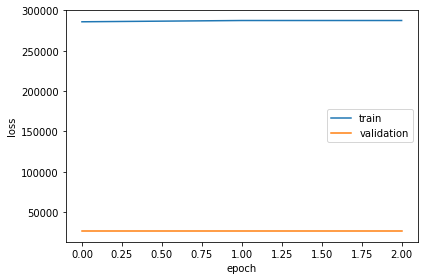

In [28]:
##### RUN HERE #####
#### Question 3.4 ###
net = SimpLeNet()
batch_size = 32
epochs = 3
learning_rate = 0.1
qname = 'question_3-4'
print(net)
train(net, batch_size, epochs, learning_rate, qname)
#####################

In [29]:
class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ##### FILL HERE #####
        #### Question 3.5 ###
        #####################
        self.conv1 = torch.nn.Conv2d(3,16,3,stride=1,padding=1)
        self.pool =  torch.nn.MaxPool2d(6,stride=6)
        self.fc1 =  torch.nn.Linear(16*50*50,8)
        self.fc2 = torch.nn.Linear(8,1)

    def forward(self, x):
        ##### FILL HERE #####
        #### Question 3.5 ###
        #####################
        x = self.conv1(x)
        x = self.pool(x)
        x = torch.flatten(x,1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=6, stride=6, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=40000, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
Number of trainable parameters: 320465


  0%|          | 0/3 [00:00<?, ?it/s]

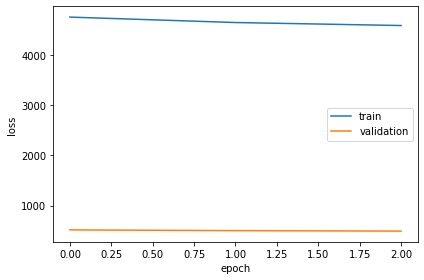

In [30]:
##### RUN HERE #####
#### Question 3.5 ###
convnet = ConvNet()
batch_size = 32
epochs = 3
learning_rate = 0.001
qname = 'question_3-5'
print(convnet)
train(convnet, batch_size, epochs, learning_rate, qname)
#####################